In [11]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 19.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 MB 2.8 MB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install requests beautifulsoup4



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from bs4 import BeautifulSoup

def get_article_content(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')

        content = '\n'.join([paragraph.get_text() for paragraph in paragraphs])
        return content
    except Exception as e:
        print(f"Error fetching content from {url}: {e}")
        return None



In [6]:
import json

# Load the data from the JSON file
with open('articles_data_biden_trump.json', 'r') as file:
    articles_data = json.load(file)

# Print the content of the JSON file
print(json.dumps(articles_data, indent=4))

{
    "Trump_left_wing_articles": [
        {
            "source": {
                "id": "cnn",
                "name": "CNN"
            },
            "author": "Kara Scannell",
            "title": "Trump asks to delay sexual assault trial following historic indictment",
            "description": "Lawyers for former President Donald Trump asked a judge to delay the start of a sexual assault and defamation trial for one month to allow a \"cooling off\" period following the historic indictment charging Trump with falsifying business records.",
            "url": "https://www.cnn.com/2023/04/12/politics/e-jean-carroll-trump-lawyers-trial/index.html",
            "urlToImage": "https://media.cnn.com/api/v1/images/stellar/prod/230412110016-e-jean-carroll-file-030420.jpg?c=16x9&q=w_800,c_fill",
            "publishedAt": "2023-04-12T10:27:14Z",
            "content": "Lawyers for former President Donald Trump asked a judge to delay the start of a sexual assault and defamation trial fo

In [3]:
import json

# Load the data from the JSON file
with open('articles_data_biden_trump.json', 'r') as file:
    articles_data = json.load(file)

# Fetch the full content of the articles
for group in articles_data:
    articles_group = articles_data[group]['articles']
    for i, article in enumerate(articles_group):
        url = article['url']
        content = get_article_content(url)
        if content:
            articles_data[group]['articles'][i]['content'] = content

# Save the data with full content to a JSON file
with open('articles_data_full_content_biden_trump.json', 'w') as file:
    json.dump(articles_data, file, ensure_ascii=False, indent=4)


TypeError: list indices must be integers or slices, not str

In [4]:
import json

# Load the data from the JSON file
with open('articles_data_biden_trump.json', 'r') as file:
    articles_data = json.load(file)

# Fetch the full content of the articles
for group in articles_data:
    for i, article in enumerate(articles_data[group]):
        url = article['url']
        content = get_article_content(url)
        if content:
            articles_data[group][i]['content'] = content

# Save the data with full content to a JSON file
with open('articles_data_full_content_biden_trump.json', 'w') as file:
    json.dump(articles_data, file, ensure_ascii=False, indent=4)


In [5]:
import json
import pandas as pd

# Load the data from the JSON file
with open('articles_data_full_content_biden_trump.json', 'r') as file:
    articles_data = json.load(file)

# Flatten the data and add wing orientation and query name
flattened_data = []

for query in ['Trump', 'Biden']:
    for wing, group in zip(['left', 'right'], [f'{query}_left_wing_articles', f'{query}_right_wing_articles']):
        articles_group = articles_data[group]
        for article in articles_group:
            flat_article = {
                'query': query,
                'wing': wing,
                'source_name': article['source']['name'],
                'author': article['author'],
                'title': article['title'],
                'description': article['description'],
                'published_at': article['publishedAt'],
                'content': article['content']
            }
            flattened_data.append(flat_article)

# Create a pandas DataFrame
df = pd.DataFrame(flattened_data)

# Display the DataFrame
df.head()


,query,wing,source_name,author,title,description,published_at,content
0,Trump,left,CNN,Kara Scannell,Trump asks to delay sexual assault trial follo...,Lawyers for former President Donald Trump aske...,2023-04-12T10:27:14Z,\n Lawyers for former President Donald Tr...
1,Trump,left,CNN,Jeremy Herb,Next steps in the Donald Trump criminal case,Tuesday's arraignment of former President Dona...,2023-04-05T20:56:16Z,\n Tuesday’s arraignment of former Presid...
2,Trump,left,CNN,Daniel Dale,Fact check: Here's the truth about crime in Ma...,As former President Donald Trump and his allie...,2023-04-17T09:00:29Z,\n As former President Donald Trump and h...
3,Trump,left,CNN,Stephen Collinson,Analysis: America faces a fateful moment ahead...,Donald Trump will take America through yet ano...,2023-04-03T04:08:00Z,\nDonald Trump will take America through yet a...
4,Trump,left,CNN,Kristen Holmes,"In between rounds of golf, Trump considers how...",Former President Donald Trump spent the weeken...,2023-04-03T01:39:58Z,\nFormer President Donald Trump spent the week...


In [10]:
# checking the values of the query column
df['query'].value_counts(), df['wing'].value_counts(), df['source_name'].value_counts(), df['author'].value_counts(), df['title'].value_counts(), df['description'].value_counts(), df['published_at'].value_counts()

(Trump    400
 Biden    354
 Name: query, dtype: int64,
 right    400
 left     354
 Name: wing, dtype: int64,
 CNN               200
 Fox News          200
 Breitbart News    200
 MSNBC             154
 Name: source_name, dtype: int64,
 Steve Benen                                 33
 Jordan Rubin                                32
 Wendell Husebø, Wendell Husebø              32
 Fox News Staff                              23
 Hannah Bleau, Hannah Bleau                  20
                                             ..
 Joyce Vance                                  1
 MSNBC.com                                    1
 Frank Figliuzzi                              1
 Susana Morris                                1
 Christian K. Caruzo, Christian K. Caruzo     1
 Name: author, Length: 284, dtype: int64,
 Trump’s embrace of Jan. 6 defendant shows pardon power — and danger                                                     2
 Trump on Biden Reelection Announcement: He Is Worse than the 5 Worst 

In [13]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the BERT model for sentiment analysis
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")



Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The expanded size of the tensor (591) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [1, 591].  Tensor sizes: [1, 512]

In [14]:
def get_sentiment(text):
    inputs = tokenizer.encode(text, return_tensors="pt")
    outputs = model(inputs)[0]
    _, prediction = torch.max(outputs, 1)
    sentiment = ["negative", "neutral", "positive"][prediction]
    return sentiment

# Apply sentiment analysis to the DataFrame
df["sentiment"] = df["content"].apply(get_sentiment)

# Display the updated DataFrame
df.head()

RuntimeError: The expanded size of the tensor (591) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [1, 591].  Tensor sizes: [1, 512]

In [18]:
def get_sentiment(text):
    # Truncate or pad the input text to fit within the model's maximum input length
    inputs = tokenizer.encode(text, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    
    # Get the model's output
    outputs = model(inputs)[0]
    
    # Obtain the sentiment prediction
    _, prediction = torch.max(outputs, 1)
    prediction_index = prediction.item()
    
    if prediction_index > 2:  # Ensure the index is within the expected range
        prediction_index = 2
    
    sentiment = ["negative", "neutral", "positive"][prediction_index]
    return sentiment



# Apply sentiment analysis to the DataFrame
df["sentiment"] = df["content"].apply(get_sentiment)

# Display the updated DataFrame
df.head()


,query,wing,source_name,author,title,description,published_at,content,sentiment
0,Trump,left,CNN,Kara Scannell,Trump asks to delay sexual assault trial follo...,Lawyers for former President Donald Trump aske...,2023-04-12T10:27:14Z,\n Lawyers for former President Donald Tr...,negative
1,Trump,left,CNN,Jeremy Herb,Next steps in the Donald Trump criminal case,Tuesday's arraignment of former President Dona...,2023-04-05T20:56:16Z,\n Tuesday’s arraignment of former Presid...,positive
2,Trump,left,CNN,Daniel Dale,Fact check: Here's the truth about crime in Ma...,As former President Donald Trump and his allie...,2023-04-17T09:00:29Z,\n As former President Donald Trump and h...,neutral
3,Trump,left,CNN,Stephen Collinson,Analysis: America faces a fateful moment ahead...,Donald Trump will take America through yet ano...,2023-04-03T04:08:00Z,\nDonald Trump will take America through yet a...,positive
4,Trump,left,CNN,Kristen Holmes,"In between rounds of golf, Trump considers how...",Former President Donald Trump spent the weeken...,2023-04-03T01:39:58Z,\nFormer President Donald Trump spent the week...,positive


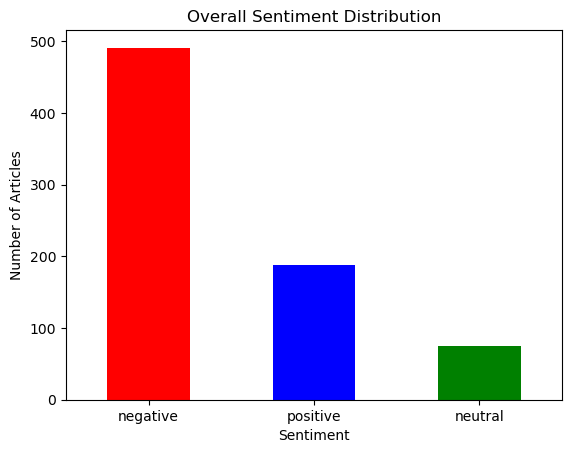

In [19]:
import matplotlib.pyplot as plt

# Function to plot sentiment distribution
def plot_sentiment_distribution(df, title):
    sentiment_counts = df["sentiment"].value_counts()
    sentiment_counts.plot(kind="bar", color=["red", "blue", "green"])
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Articles")
    plt.title(title)
    plt.xticks(rotation=0)
    plt.show()

# Overall sentiment distribution
plot_sentiment_distribution(df, "Overall Sentiment Distribution")

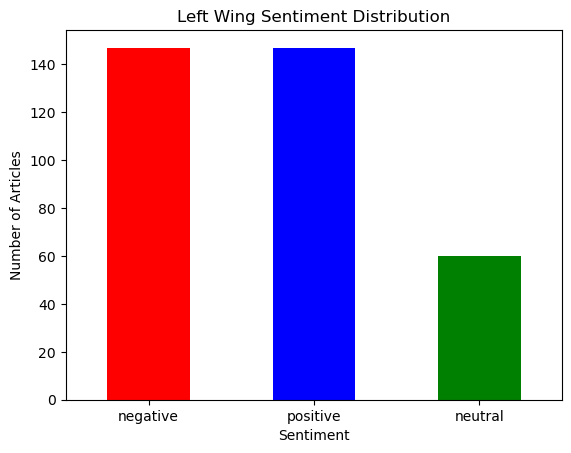

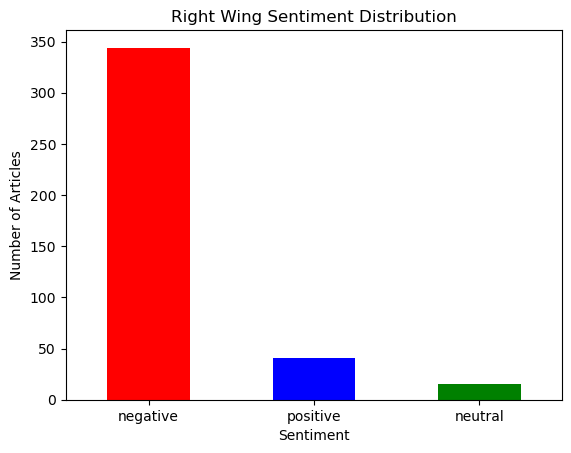

In [20]:
# Sentiment distribution by political orientation
for wing in ["left", "right"]:
    plot_sentiment_distribution(df[df["wing"] == wing], f"{wing.capitalize()} Wing Sentiment Distribution")

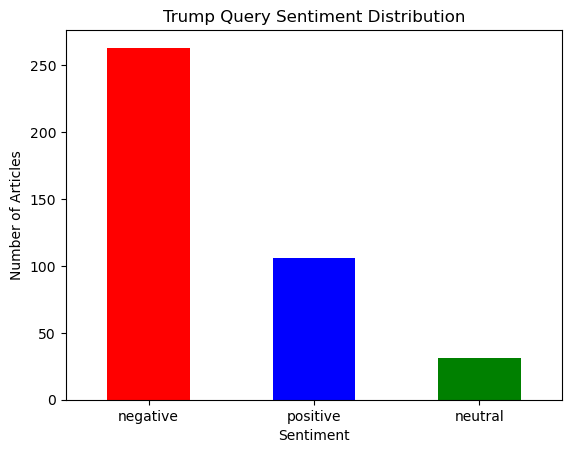

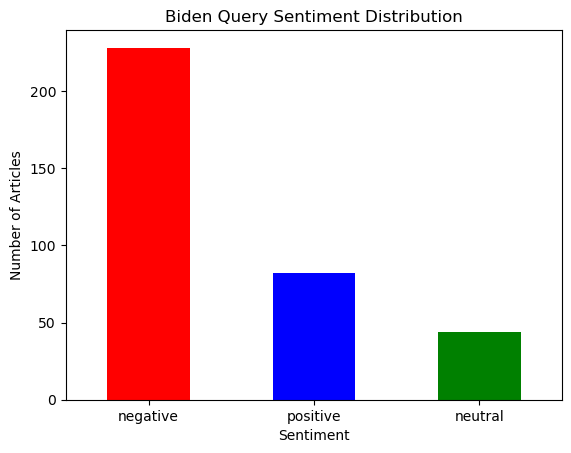

In [21]:
# Sentiment distribution by query
for query in ["Trump", "Biden"]:
    plot_sentiment_distribution(df[df["query"] == query], f"{query.capitalize()} Query Sentiment Distribution")
    

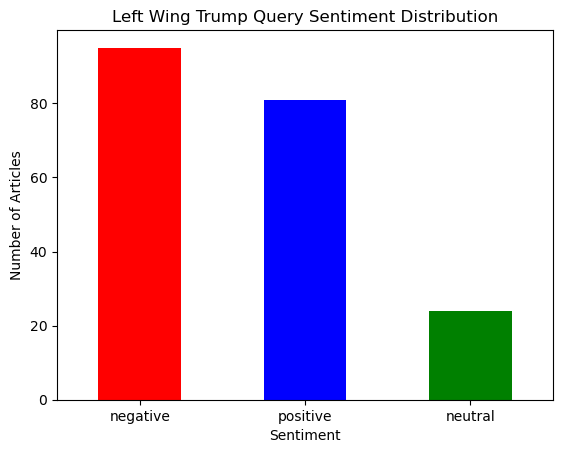

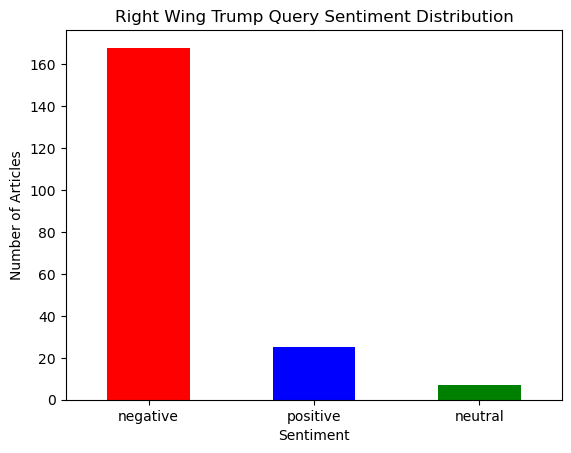

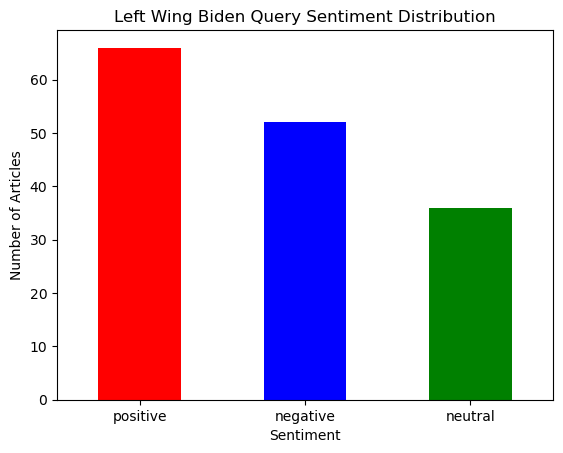

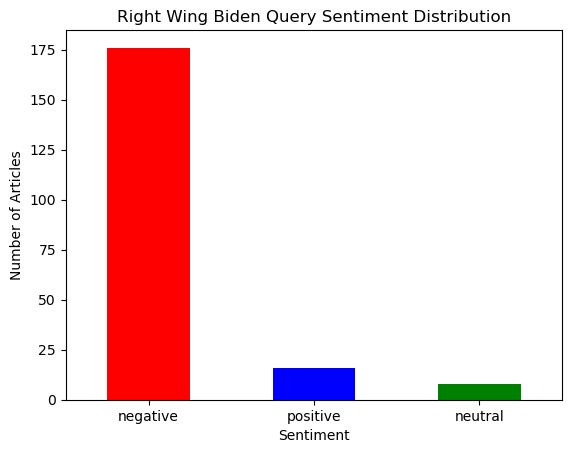

In [22]:
# let's group by query and wing and plot the sentiment distribution
for query in ["Trump", "Biden"]:
    for wing in ["left", "right"]:
        plot_sentiment_distribution(df[(df["query"] == query) & (df["wing"] == wing)], f"{wing.capitalize()} Wing {query.capitalize()} Query Sentiment Distribution")

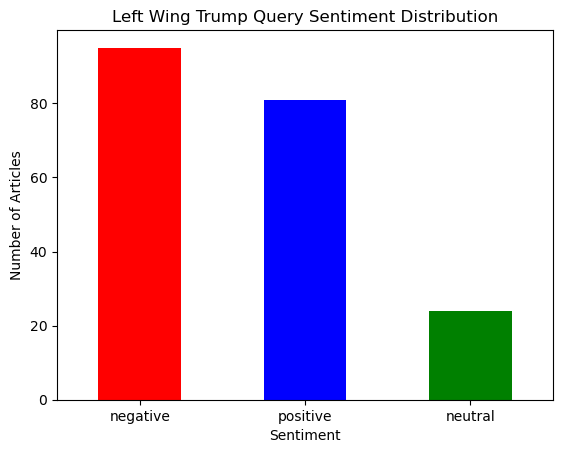

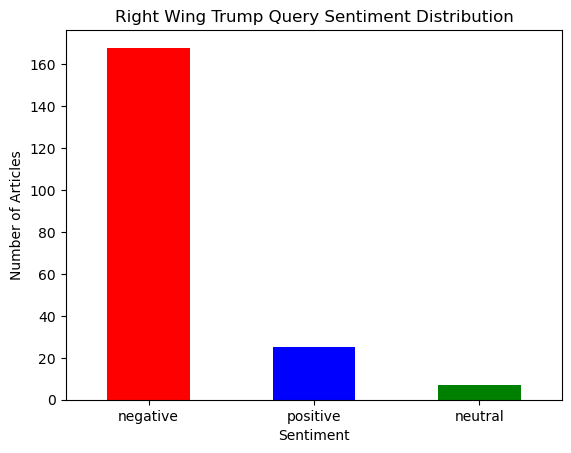

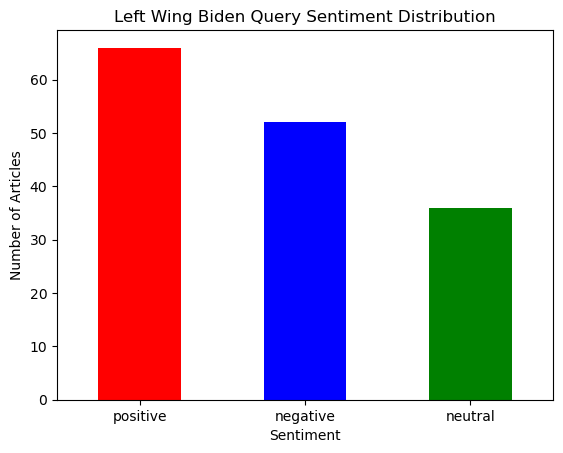

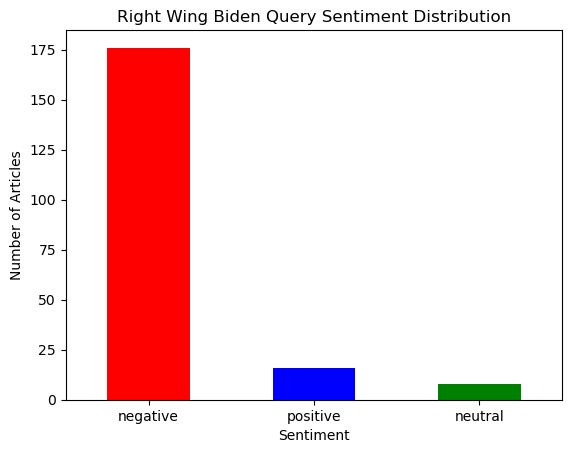

In [23]:
# let's group by author and plot the sentiment distribution
for query in ["Trump", "Biden"]:
    for wing in ["left", "right"]:
        plot_sentiment_distribution(df[(df["query"] == query) & (df["wing"] == wing)], f"{wing.capitalize()} Wing {query.capitalize()} Query Sentiment Distribution")

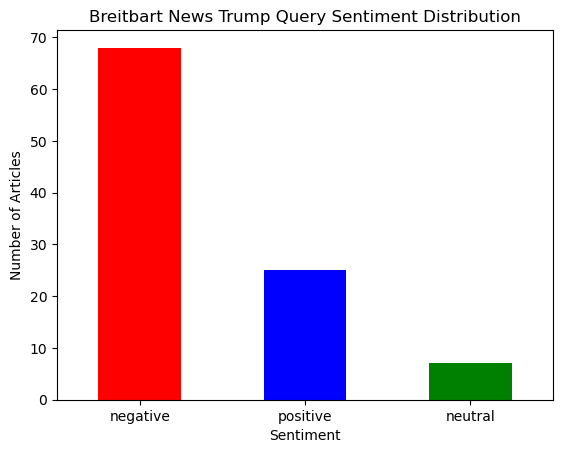

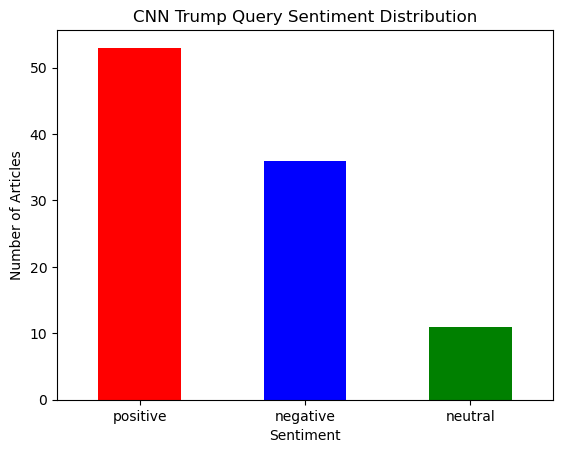

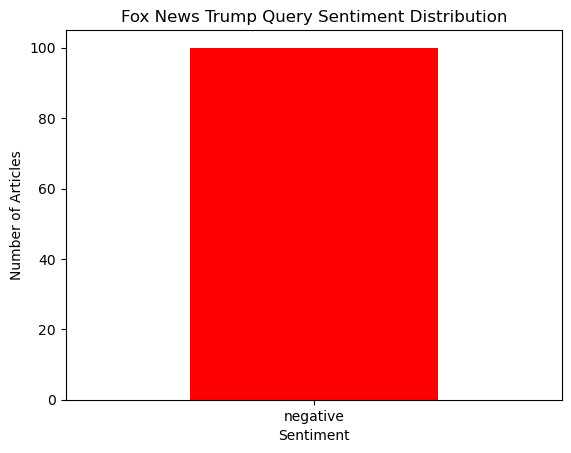

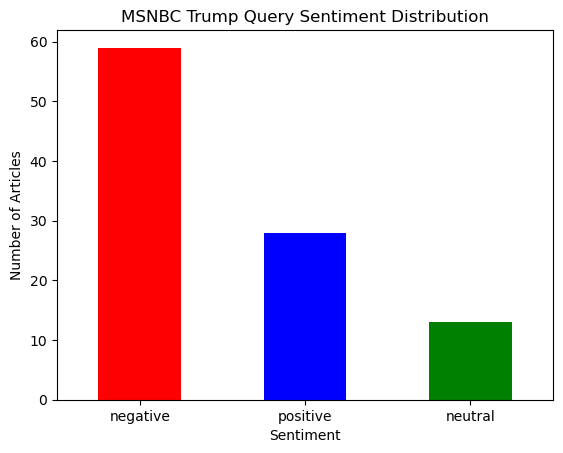

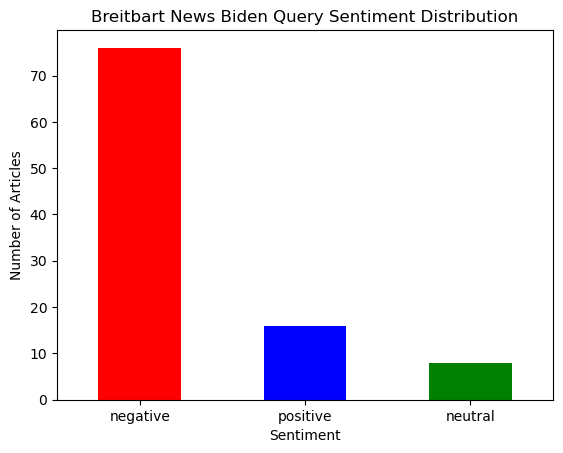

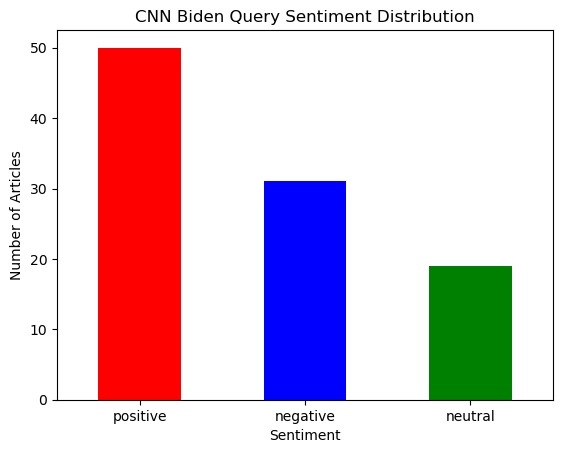

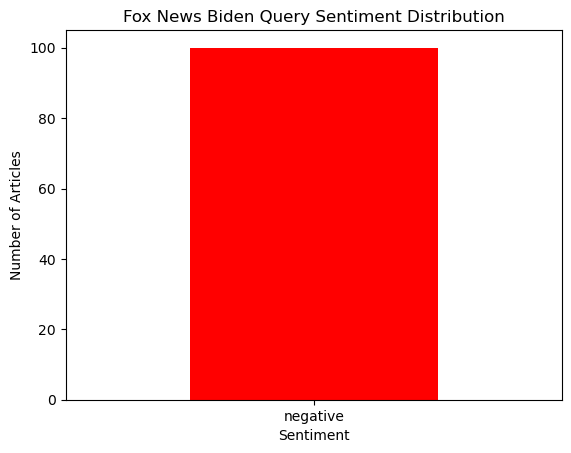

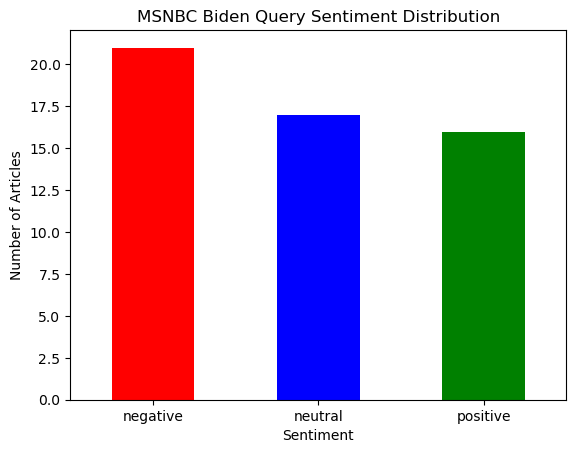

In [24]:
# lets group by source name column and plot the sentiment distribution
for query in ["Trump", "Biden"]:
    # group by source name
    df_grouped = df[(df["query"] == query)].groupby("source_name")

    # plot the sentiment distribution for each source
    for source_name, group in df_grouped:
        plot_sentiment_distribution(group, f"{source_name} {query.capitalize()} Query Sentiment Distribution")
        

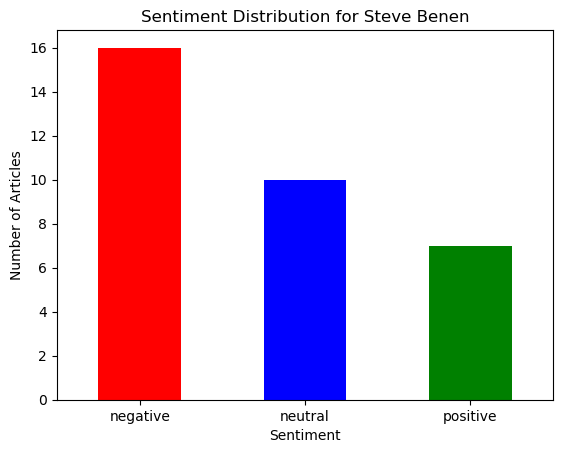

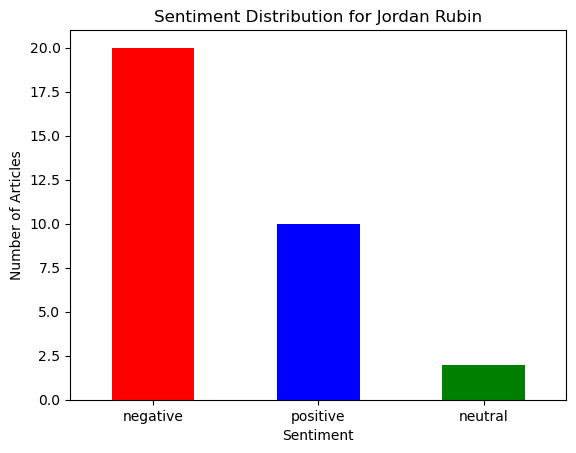

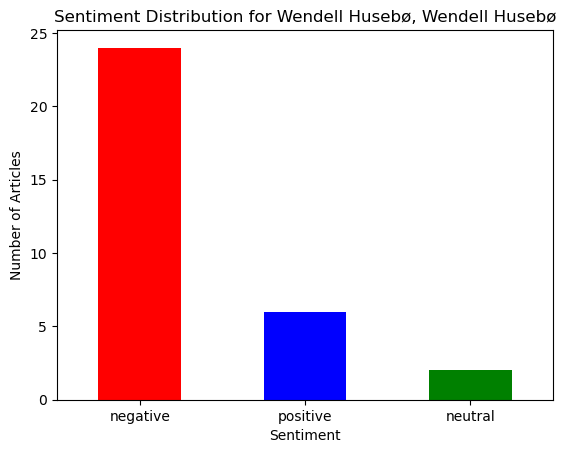

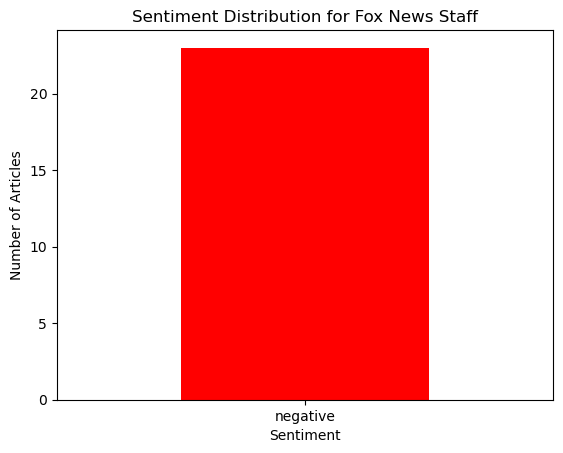

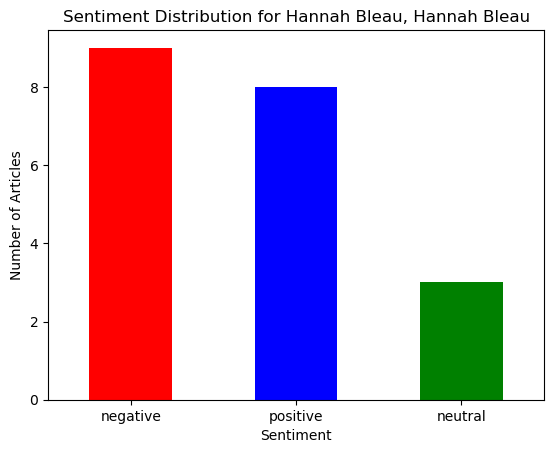

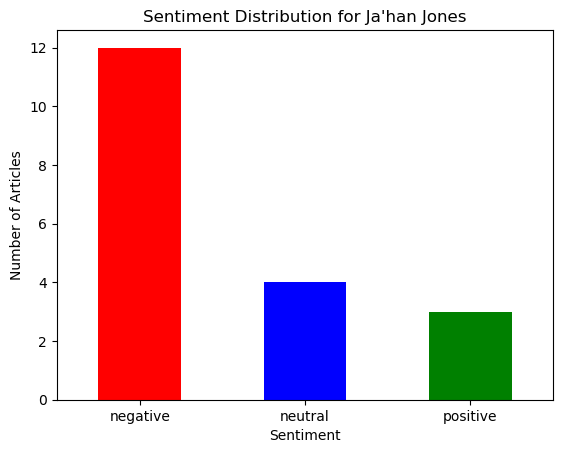

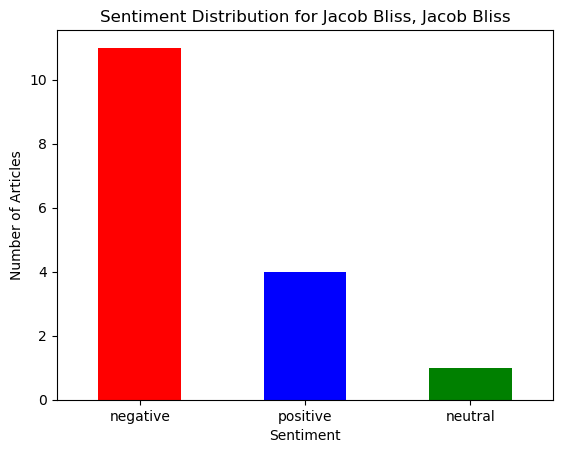

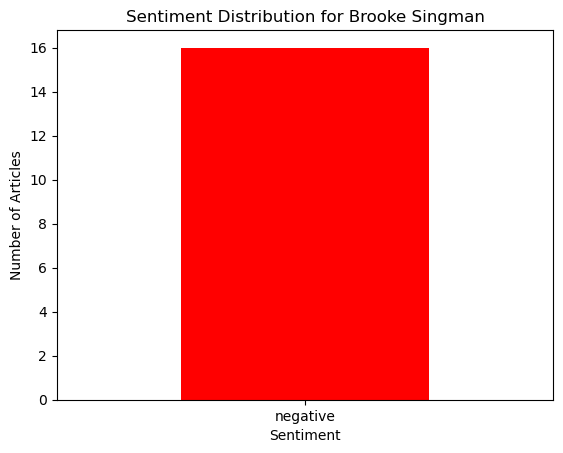

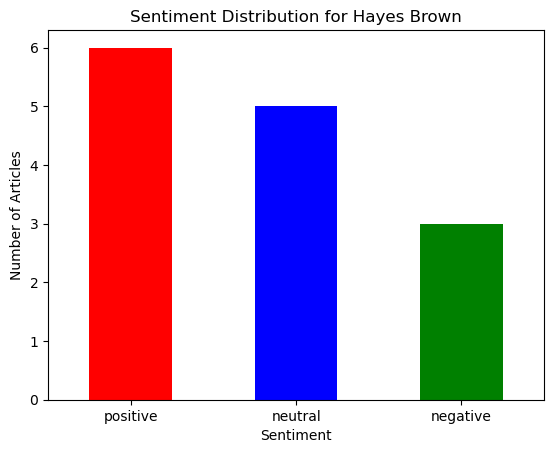

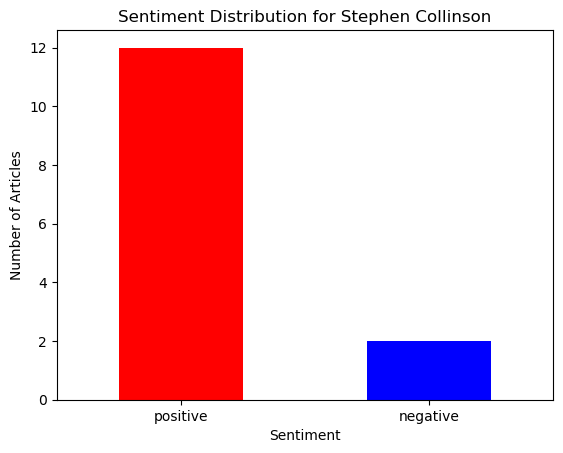

In [27]:
top_authors = df['author'].value_counts().head(10).index
df_top_authors = df[df['author'].isin(top_authors)]

for author in top_authors:
    plot_sentiment_distribution(df_top_authors[df_top_authors['author'] == author], f"Sentiment Distribution for {author}")


In [26]:
# let group by author and plot the sentiment distribution
for query in ["Trump", "Biden"]:
    # group by author
    df_grouped = df[(df["query"] == query)].groupby("author")

    # only get top 10 authors by number of articles
    df_grouped = df_grouped.filter(lambda x: len(x) > 10)

    # plot the sentiment distribution for each author
    for author, group in df_grouped:
        plot_sentiment_distribution(group, f"{author} {query.capitalize()} Query Sentiment Distribution")

ValueError: too many values to unpack (expected 2)